In [58]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Reshape, Flatten
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split




In [59]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()


In [60]:
len(x_train)
len(y_train)
len(x_test)
len(y_test)

10000

In [61]:
x_train[2]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,  67, 232,  39,   0,   0,   0,
          0,   0],
       [  

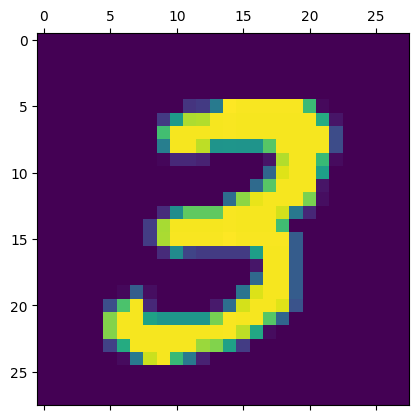

In [62]:
plt.matshow(x_train[7])

In [63]:
x_train.shape

(60000, 28, 28)

In [64]:
x_train=x_train/255
x_test=x_test/255

In [65]:
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_train_flatten.shape

(60000, 784)

In [66]:
x_test_flatten=x_test.reshape(len(x_test),28*28)
x_test_flatten.shape

(10000, 784)

In [67]:
x_train_flatten[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [68]:
model=keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,),activation='softmax')
])
model.compile(optimizer='RMSprop', loss='sparse_categorical_crossentropy', metrics=['accuracy'] )
df=model.fit(x_train_flatten,y_train,epochs=10,batch_size=1000,validation_data=(x_test_flatten,y_test))


Epoch 1/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5400 - loss: 1.6670 - val_accuracy: 0.8388 - val_loss: 0.7817
Epoch 2/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8436 - loss: 0.7135 - val_accuracy: 0.8796 - val_loss: 0.4974
Epoch 3/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8783 - loss: 0.4876 - val_accuracy: 0.8985 - val_loss: 0.3991
Epoch 4/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8916 - loss: 0.4058 - val_accuracy: 0.9055 - val_loss: 0.3544
Epoch 5/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9010 - loss: 0.3636 - val_accuracy: 0.9109 - val_loss: 0.3296
Epoch 6/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9073 - loss: 0.3389 - val_accuracy: 0.9140 - val_loss: 0.3166
Epoch 7/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.9094 - loss: 0.3294 - val_accuracy: 0.9159 - val_loss: 0.3052
Epoch 8/10
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9132 - loss: 0.3131 - val_accuracy: 0.9170 - val_los

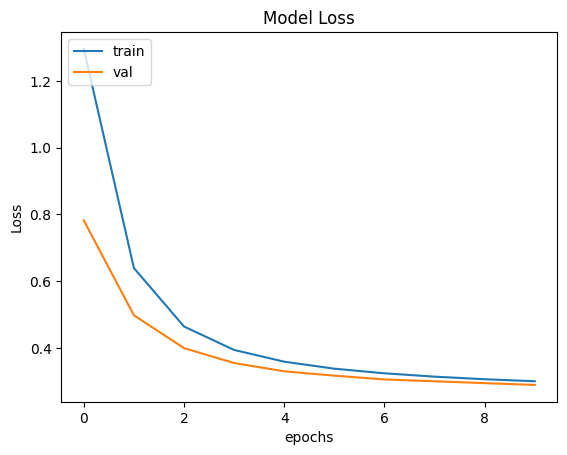

In [69]:
plt.plot(df.history['loss'])
plt.plot(df.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

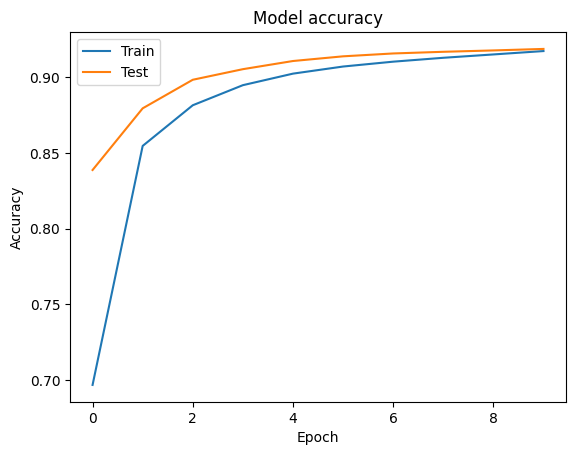

In [70]:
plt.plot(df.history['accuracy'])
plt.plot(df.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()